OHE+LR /
LE+RF /
OHE+SVD+RF /
LE+XGB

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df_train = pd.read_csv('train.csv',nrows = 10000)
df_train.shape

(10000, 25)

In [3]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10000 non-null  int64  
 1   bin_0   9703 non-null   float64
 2   bin_1   9667 non-null   float64
 3   bin_2   9680 non-null   float64
 4   bin_3   9710 non-null   object 
 5   bin_4   9690 non-null   object 
 6   nom_0   9686 non-null   object 
 7   nom_1   9689 non-null   object 
 8   nom_2   9672 non-null   object 
 9   nom_3   9693 non-null   object 
 10  nom_4   9706 non-null   object 
 11  nom_5   9710 non-null   object 
 12  nom_6   9703 non-null   object 
 13  nom_7   9685 non-null   object 
 14  nom_8   9713 non-null   object 
 15  nom_9   9709 non-null   object 
 16  ord_0   9719 non-null   float64
 17  ord_1   9683 non-null   object 
 18  ord_2   9699 non-null   object 
 19  ord_3   9699 non-null   object 
 20  ord_4   9685 non-null   object 
 21  ord_5   9685 non-null   object 
 22 

In [152]:
df_train.isnull().sum()

id          0
bin_0     297
bin_1     333
bin_2     320
bin_3     290
bin_4     310
nom_0     314
nom_1     311
nom_2     328
nom_3     307
nom_4     294
nom_5     290
nom_6     297
nom_7     315
nom_8     287
nom_9     291
ord_0     281
ord_1     317
ord_2     301
ord_3     301
ord_4     315
ord_5     315
day       328
month     308
target      0
dtype: int64

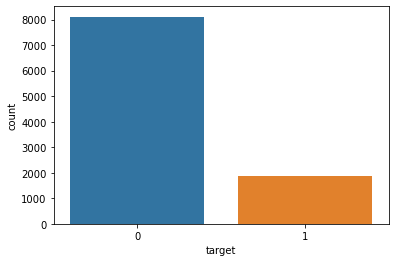

In [153]:
import seaborn as sns
df_train.target.value_counts()
sns.countplot(data = df_train, x = 'target')

In [482]:
cols = [x for x in df_train.columns if x not in ['id','target']]
for i in cols:
    df_train[i] = df_train[i].astype(str).fillna('None')


In [483]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   bin_0   10000 non-null  object
 2   bin_1   10000 non-null  object
 3   bin_2   10000 non-null  object
 4   bin_3   10000 non-null  object
 5   bin_4   10000 non-null  object
 6   nom_0   10000 non-null  object
 7   nom_1   10000 non-null  object
 8   nom_2   10000 non-null  object
 9   nom_3   10000 non-null  object
 10  nom_4   10000 non-null  object
 11  nom_5   10000 non-null  object
 12  nom_6   10000 non-null  object
 13  nom_7   10000 non-null  object
 14  nom_8   10000 non-null  object
 15  nom_9   10000 non-null  object
 16  ord_0   10000 non-null  object
 17  ord_1   10000 non-null  object
 18  ord_2   10000 non-null  object
 19  ord_3   10000 non-null  object
 20  ord_4   10000 non-null  object
 21  ord_5   10000 non-null  object
 22  day     10000 non-null 

In [160]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,nan,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,nan,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,nan,3.0,nan,Freezing,n,P,eN,5.0,9.0,0
3,3,nan,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,nan,3.0,3.0,0
4,4,0.0,nan,0.0,T,N,Red,Triangle,Hamster,Costa Rica,nan,777d1ac2c,3a7975e46,bc9cc2a94,nan,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [223]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cols:
    le.fit(df_train[col])
    df_train[col] = le.transform(df_train[col])
    


In [226]:
X = df_train.drop('target',axis = 1)
Y = df_train['target']

In [227]:
from sklearn.model_selection import train_test_split

x_tr,x_val,y_tr,y_val = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 43)

In [228]:
x_tr.shape

(8000, 24)

In [229]:
x_tr.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
955,955,0,0,0,1,0,1,5,3,4,0,431,1323,31,222,1270,2,4,1,4,2,26,6,3
2339,2339,1,0,0,1,1,2,4,2,2,3,113,1400,24,66,1238,3,2,2,3,1,44,0,12
9088,9088,0,1,1,0,0,2,0,4,3,3,762,1233,178,88,1624,2,1,2,0,13,23,2,9
8004,8004,0,0,0,0,0,1,4,0,4,0,972,1109,143,83,650,2,4,0,15,0,29,1,2
1852,1852,0,0,0,1,1,0,3,0,4,3,798,908,38,97,579,0,1,5,10,4,111,4,0


In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [237]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#print(random_grid)

model = RandomForestClassifier()

clf = RandomizedSearchCV(model,random_grid,scoring='roc_auc',
                        n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs =-1)
op = clf.fit(x_tr,y_tr)
print(op.best_params_)
op.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [238]:
op.best_score_

0.7129266625169645

In [253]:
clf=RandomForestClassifier(n_estimators = 300, min_samples_split = 100,min_samples_leaf = 5,max_features = 'auto',max_depth = 15,random_state=42,n_jobs=-1)
clf.fit(x_tr,y_tr)
y_pred_prob = clf.predict_proba(x_val)[:, 1]
score = roc_auc_score(y_val,y_pred_prob)
score

0.698880799065756

In [256]:
#random model

test_len = len(y_val)

# we create a output array that has exactly same size as the test data;#-- we can do this on train data also 

predicted_y = np.zeros((test_len,2)) # 2 here refers to no of class labels
for i in range(test_len):
    rand_probs = np.random.rand(1,2) # 2 here refers to no of class labels
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("auc_roc on Test Data using Random Model",roc_auc_score(y_val, predicted_y[:, 1])) 


auc_roc on Test Data using Random Model 0.5076657598235896


In [4]:
df = pd.read_csv('train.csv',nrows = 10000)
df.shape

(10000, 25)

In [5]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [6]:
cols = [x for x in df.columns if x not in ['id','target']]
for i in cols:
    df[i] = df[i].astype(str).fillna('None')

In [486]:
df.isnull().sum()

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [7]:
df.loc[
    df['nom_5'].value_counts()[
        df['nom_5']].values < 10 , 'nom_5'] = 'rare'

In [8]:
df.loc[
    df['nom_6'].value_counts()[
        df['nom_6']].values < 10 , 'nom_6'] = 'rare'

In [9]:
df.loc[
    df['nom_7'].value_counts()[
        df['nom_7']].values < 10 , 'nom_7'] = 'rare'

In [10]:
df.loc[
    df['nom_8'].value_counts()[
        df['nom_8']].values < 10 , 'nom_8'] = 'rare'

In [11]:
df.loc[
    df['nom_9'].value_counts()[
        df['nom_9']].values < 10 , 'nom_9'] = 'rare'

In [12]:
df.loc[
    df['ord_3'].value_counts()[
        df['ord_3']].values < 100 , 'ord_3'] = 'rare'

In [13]:
df.loc[
    df['ord_4'].value_counts()[
        df['ord_4']].values < 100 , 'ord_4'] = 'rare'

In [14]:
df.loc[
    df['ord_5'].value_counts()[
        df['ord_5']].values < 50 , 'ord_5'] = 'rare'

In [517]:

df['ord_5'].value_counts()


rare    2121
nan      315
Fl       166
DN       166
Sz       153
        ... 
Rz        51
AW        51
Yi        50
Rj        50
fe        50
Name: ord_5, Length: 103, dtype: int64

In [316]:
df.loc[
    df['ord_5'].value_counts()[
        df['ord_5']].values < 50]

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target


In [360]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,rare,rare,598080a91,0256c7a4b,rare,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,nan,Theremin,2bb3c3e5c,rare,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,nan,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,nan,3.0,nan,Freezing,n,P,rare,5.0,9.0,0
3,3,nan,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,rare,rare,3a33ef960,bdaa56dd1,rare,1.0,Novice,Lava Hot,a,C,nan,3.0,3.0,0
4,4,0.0,nan,0.0,T,N,Red,Triangle,Hamster,Costa Rica,nan,rare,rare,bc9cc2a94,nan,rare,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [370]:
x_val.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
6422,0,0,1,0,1,2,4,0,4,3,451,370,160,153,166,1,1,4,1,14,74,5,7
4841,0,0,1,0,0,2,4,4,5,0,206,370,15,107,166,0,2,5,0,6,88,6,8
9860,0,2,2,0,0,2,3,2,3,2,466,370,175,143,166,2,1,2,8,0,36,3,7
9514,0,1,1,0,1,1,1,2,4,3,466,369,178,24,166,2,1,2,0,7,30,6,0
9594,0,0,1,1,1,0,0,3,4,0,227,370,89,54,166,0,0,2,13,6,62,4,0


In [15]:
X = df.drop(['target','id'],axis = 1)
Y = df['target']

In [16]:
from sklearn.model_selection import train_test_split

x_tr,x_val,y_tr,y_val = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 43)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cols:
    le.fit(x_tr[col])
    x_tr.loc[:,col] = le.transform(x_tr[col])
    x_val.loc[:,col] = le.transform(x_val[col])


In [23]:
x_tr

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
955,0,0,0,1,0,1,5,3,4,0,466,346,27,197,166,2,4,1,4,2,17,6,3
2339,1,0,0,1,1,2,4,2,2,3,52,369,21,56,103,3,2,2,3,1,29,0,12
9088,0,1,1,0,0,2,0,4,3,3,318,325,161,76,166,2,1,2,0,10,88,2,9
8004,0,0,0,0,0,1,4,0,4,0,402,370,130,73,166,2,4,0,13,0,20,1,2
1852,0,0,0,1,1,0,3,0,4,3,337,243,34,84,166,0,1,5,9,4,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158,0,0,1,1,1,1,2,2,4,3,466,370,134,29,166,1,2,4,8,12,88,5,10
5993,0,0,0,1,1,0,5,0,4,0,260,47,182,168,166,1,1,0,10,13,54,1,8
7619,1,0,0,1,0,2,5,4,2,3,466,370,63,120,166,2,0,2,7,18,76,1,8
8299,0,0,0,1,0,2,0,2,4,4,153,370,42,25,166,2,3,3,0,21,88,2,7


In [534]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#print(random_grid)

model = RandomForestClassifier()

clf = RandomizedSearchCV(model,random_grid,scoring='roc_auc',
                        n_iter = 10, cv = , verbose=2, random_state=42, n_jobs =-1)
op = clf.fit(x_tr,y_tr)
print(op.best_params_)
op.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.3min finished


{'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 20}


0.7077260992459107

In [373]:
clf=RandomForestClassifier(n_estimators = 700, min_samples_split = 5,min_samples_leaf = 10,max_features = 'auto',max_depth = 20,random_state=42,n_jobs=-1)
clf.fit(x_tr,y_tr)
y_pred_prob = clf.predict_proba(x_val)[:, 1]
score = roc_auc_score(y_val,y_pred_prob)
score

0.7075871450100797

In [465]:
df = pd.read_csv('train.csv',nrows = 10000)
df.shape

(10000, 25)

In [466]:
cols = [x for x in df_train.columns if x not in ['id','target']]
for i in cols:
    df[i] = df[i].astype(str).fillna('None')


In [467]:
df.loc[
    df['nom_5'].value_counts()[
        df['nom_5']].values < 10 , 'nom_5'] = 'rare'

In [468]:
df.loc[
    df['nom_6'].value_counts()[
        df['nom_6']].values < 10 , 'nom_6'] = 'rare'

In [469]:
df.loc[
    df['nom_7'].value_counts()[
        df['nom_7']].values < 10 , 'nom_7'] = 'rare'

In [470]:
df.loc[
    df['nom_8'].value_counts()[
        df['nom_8']].values < 10 , 'nom_8'] = 'rare'

In [471]:
df.loc[
    df['nom_9'].value_counts()[
        df['nom_9']].values < 10 , 'nom_9'] = 'rare'

In [472]:
df.loc[
    df['ord_3'].value_counts()[
        df['ord_3']].values < 100 , 'ord_3'] = 'rare'

In [473]:
df.loc[
    df['ord_4'].value_counts()[
        df['ord_4']].values < 100 , 'ord_4'] = 'rare'

In [474]:
df.loc[
    df['ord_5'].value_counts()[
        df['ord_5']].values < 50 , 'ord_5'] = 'rare'

In [523]:
X = df.drop(['target','id'],axis = 1)
Y = df['target']

In [545]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 43)

In [546]:
ohe.fit(x_train[cols])
x_train = ohe.transform(x_train[cols])
x_test = ohe.transform(x_test[cols])

In [543]:
x_train

<8000x1602 sparse matrix of type '<class 'numpy.float64'>'
	with 137781 stored elements in Compressed Sparse Row format>

In [539]:
# ohe+LR
penalty = ['l1','l2','elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
alpha = [10 ** x for x in range(-5, 4)]

# Create the random grid
random_grid = { 'penalty' : penalty,
               'solver': solver,
               'C': alpha,
               }

#print(random_grid)

model = LogisticRegression(class_weight = 'balanced')

clf = RandomizedSearchCV(model,random_grid,scoring='roc_auc',
                        n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs =-1)
op = clf.fit(x_train,y_train)
print(op.best_params_)
op.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s


{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.8s finished


0.7219303258196513

In [540]:

model = LogisticRegression(penalty='l2',C=0.1,class_weight='balanced',solver = 'liblinear',random_state = 43)
model.fit(x_train,y_train)
y_pred_prob = model.predict_proba(x_test)[:,1]
score = roc_auc_score(y_test,y_pred_prob)
score

0.7259784445357811

In [549]:
# ohe+svd+rf
from scipy import sparse
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 120)
#full_sparse = sparse.vstack((x_train,x_))
#svd.fit(full_sparse)
svd.fit(x_train)
x_train = svd.transform(x_train)
x_test = svd.transform(x_test)



In [551]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#print(random_grid)

model = RandomForestClassifier()

clf = RandomizedSearchCV(model,random_grid,scoring='roc_auc',
                        n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs =-1)
op = clf.fit(x_train,y_train)
print(op.best_params_)
op.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.8min finished


{'n_estimators': 300, 'min_samples_split': 100, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 15}


0.685542199410198

In [552]:
clf=RandomForestClassifier(n_estimators = 300, min_samples_split = 100,min_samples_leaf = 5,max_features = 'auto',max_depth = 15,random_state=42,n_jobs=-1)
clf.fit(x_train,y_train)
y_pred_prob = clf.predict_proba(x_test)[:, 1]
score = roc_auc_score(y_test,y_pred_prob)
score

0.6988008794420631

In [36]:
from xgboost import XGBClassifier

x_clf= XGBClassifier()

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_clf1=RandomizedSearchCV(x_clf,param_distributions=params,verbose=10,n_jobs=-1,) # remove verbose n try
random_clf1.fit(x_tr,y_tr)

print (random_clf1.best_params_)

ModuleNotFoundError: No module named 'xgboost'